This is code for performing linear regression in three ways:
1) Using a gradient descent optimizer that I build from scratch.
2) Using the Normal Equation.
3) Using scikit-learn's built in tool.

The models are tested using datasets that were taken from Andrew Ng's Machine Learning course on Coursera.

In [1]:
import numpy as np
from sklearn.metrics import r2_score
import Single_Layer_Optimizers # This defines various shallow learning classes, such as linear and logistic regression.

In [2]:
# Load the Data
file = open('regression_data_multi.txt')
data = np.array([[float(number) for number in line.split(',')] for line in file.readlines()])
file.close()

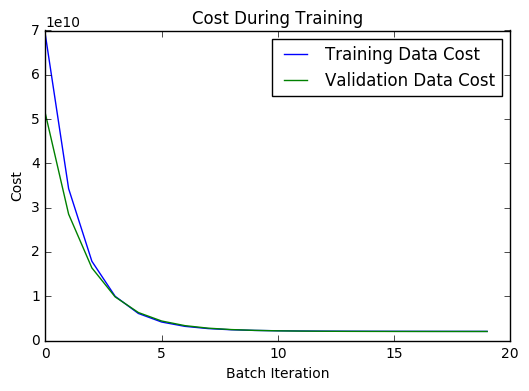

In [14]:
# Run the Linear Regression
lr = Single_Layer_Optimizers.Linear_Regression(data)
lr.fit(alpha = 0.3, iterations = 20, init = 'zeros', val_set_fraction = 0.2)

# Plot the cost
lr.plot_cost()

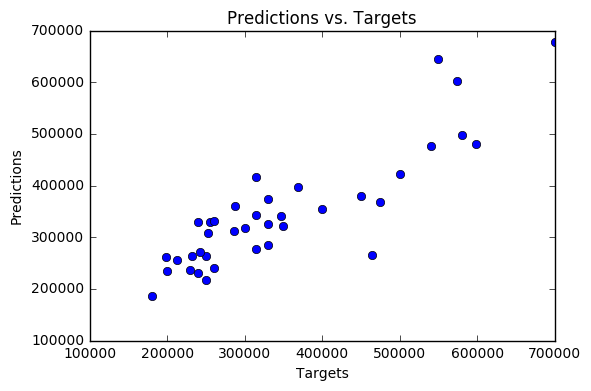

Fraction of variance explained is  0.761822598414


In [15]:
# Check how well the model fits the training data
lr.predict(dataset = 'train')
lr.target_prediction_plot()
lr.Variance_Explained()

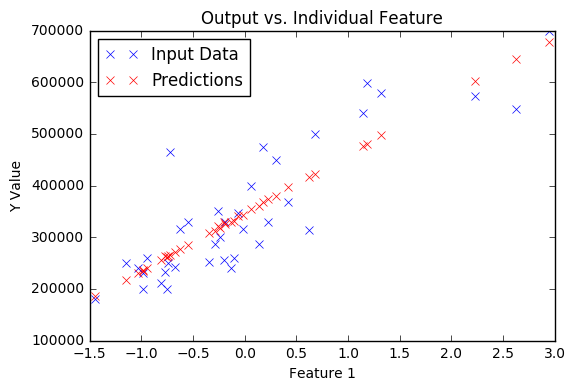

In [16]:
# Check the influence of individual features
lr.single_feature_plot(feature=1)

In [17]:
# Compare the results to those of the Normal Equation
print("Linear Regression results in weights of ", lr.weights)
lr.NormalEquation()

Linear Regression results in weights of  [ 347233.10831726  114256.52689842   -2452.5303772 ]
Normal Equation results in weights of  [ 347510.39473684  117989.42501297   -6185.07155199]


In [18]:
#### COMPARE RESULTS TO SKLEARN, USING SAME TRAINING AND VALIDATION DATA ####
from sklearn.linear_model import LinearRegression
LR = LinearRegression().fit(lr.train_data[:,1:], lr.train_target)
print("My Linear Regression results in weights of ", lr.weights)
print("sklearn results in weights of ", LR.intercept_, LR.coef_)
print("Fraction of training data variance explained by sklearn results is ", r2_score(lr.train_target, LR.predict(lr.train_data[:,1:])))

My Linear Regression results in weights of  [ 347233.10831726  114256.52689842   -2452.5303772 ]
sklearn results in weights of  347510.394737 [ 117989.42501297   -6185.07155199]
Fraction of training data variance explained by sklearn results is  0.762534043301


In [28]:
#### SHORT VERSION OF CODE USING SKLEARN ####
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

file = open('regression_data_multi.txt')
data = np.array([[float(number) for number in line.split(',')] for line in file.readlines()])
file.close()
train_data, test_data, train_target, test_target = train_test_split(data[:,0:-1], data[:,-1])
scaler = StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)
LR = LinearRegression(normalize=True).fit(train_data, train_target)
print("sklearn results in weights of ", LR.intercept_, LR.coef_)
train_predictions = LR.predict(train_data)
print("Fraction of training data variance explained is ", r2_score(train_target, train_predictions))
test_predictions = LR.predict(test_data)
print("Fraction of validation data variance explained is ", r2_score(test_target, test_predictions))

sklearn results in weights of  336502.742857 [ 104247.20710314   -8478.18683812]
Fraction of training data variance explained is  0.6881724999
Fraction of validation data variance explained is  0.822331062335


In [29]:
# Unidimensional plot of sklearn results
if train_data.shape[1] == 1:
    plt.plot(test_data, test_target, 'bo', test_data, test_predictions)
    plt.xlabel('Feature Value')
    plt.ylabel('Y Value')
    plt.legend(('Input Data', 'Prediction Line'), loc = 'best')
    plt.title('Validation Data Prediction Line Plot')
    plt.show()